In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [2]:
feature_set = pd.read_csv(r"/Users/abhijit/Desktop/GIT_Projects/intl-iot/features/us/yi-camera.csv")
feature_set.head()

,meanBytes,minBytes,maxBytes,medAbsDev,skewLength,kurtosisLength,q10,q20,q30,q40,...,q80,q90,spanOfGroup,meanTBP,varTBP,medianTBP,kurtosisTBP,skewTBP,device,state
0,178.960938,46,1214,17.791227,2.865017,7.447516,50.0,54.0,54.0,62.0,...,150.0,346.0,94.438767,0.140395,0.356051,0.016966,90.120448,9.073159,yi-camera,power
1,165.726562,46,1214,23.721635,2.965653,8.123622,50.0,54.0,54.0,54.0,...,150.0,375.1,94.699045,0.241365,1.270754,0.015900,27.074528,5.380608,yi-camera,power
2,148.593750,46,1214,23.721635,3.806028,14.272252,50.0,54.0,54.0,62.0,...,150.0,304.7,94.451954,0.295708,1.370524,0.013464,24.338574,5.028079,yi-camera,power
3,187.367188,46,1214,17.791227,2.602090,6.051579,54.0,54.0,54.0,65.2,...,150.0,457.4,94.699169,0.117183,0.398694,0.009831,102.365185,9.884175,yi-camera,power
4,177.187500,46,1214,23.721635,2.814351,6.727281,50.0,54.0,54.0,54.0,...,150.0,375.1,93.697956,0.256762,1.286913,0.011779,26.047730,5.249770,yi-camera,power


In [4]:
feature_set.state.value_counts()

android_lan_recording    440
android_lan_photo        430
android_wan_recording    400
android_wan_watch        400
android_wan_photo        400
android_lan_watch        370
power                     30
local_move                20
Name: state, dtype: int64

In [8]:
feature_values = feature_set.drop(['device','state'],axis=1)
feature_values.head()

,meanBytes,minBytes,maxBytes,medAbsDev,skewLength,kurtosisLength,q10,q20,q30,q40,...,q60,q70,q80,q90,spanOfGroup,meanTBP,varTBP,medianTBP,kurtosisTBP,skewTBP
0,178.960938,46,1214,17.791227,2.865017,7.447516,50.0,54.0,54.0,62.0,...,74.0,123.0,150.0,346.0,94.438767,0.140395,0.356051,0.016966,90.120448,9.073159
1,165.726562,46,1214,23.721635,2.965653,8.123622,50.0,54.0,54.0,54.0,...,77.0,123.0,150.0,375.1,94.699045,0.241365,1.270754,0.015900,27.074528,5.380608
2,148.593750,46,1214,23.721635,3.806028,14.272252,50.0,54.0,54.0,62.0,...,70.8,129.3,150.0,304.7,94.451954,0.295708,1.370524,0.013464,24.338574,5.028079
3,187.367188,46,1214,17.791227,2.602090,6.051579,54.0,54.0,54.0,65.2,...,77.0,143.5,150.0,457.4,94.699169,0.117183,0.398694,0.009831,102.365185,9.884175
4,177.187500,46,1214,23.721635,2.814351,6.727281,50.0,54.0,54.0,54.0,...,74.0,93.0,150.0,375.1,93.697956,0.256762,1.286913,0.011779,26.047730,5.249770


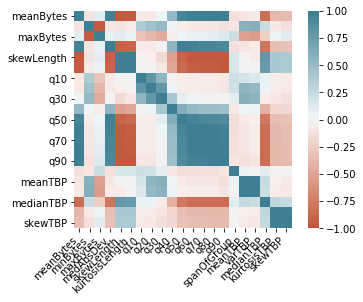

In [11]:
corr = feature_values.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

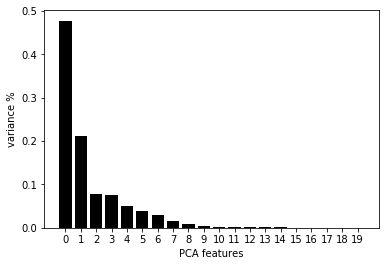

In [24]:
X_std = StandardScaler().fit_transform(feature_values)
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [21]:
pca.explained_variance_ratio_

array([4.77180065e-01, 2.11665759e-01, 7.72720083e-02, 7.56785990e-02,
       5.05604921e-02, 3.95291175e-02, 2.97949590e-02, 1.47839573e-02,
       8.52889754e-03, 5.09573568e-03, 2.72255273e-03, 2.50209508e-03,
       1.75744258e-03, 9.33600849e-04, 8.34775748e-04, 5.50025063e-04,
       2.74022849e-04, 2.62176162e-04, 3.83524896e-05, 2.26775069e-05])

In [ ]:
arr.argsort()[-3:][::-1]

In [18]:
top_4_variable_explanation = abs(pca.components_[:4])
arr = []
for n in top_4_variable_explanation:
    top = n.argsort()[-5:][::-1]
    arr.append(top)
print(arr)

[array([ 0, 11, 13, 12, 14]), array([16,  8,  1, 17,  7]), array([20, 19,  9,  8, 10]), array([15,  6,  7,  2,  1])]


In [20]:
for n,i in enumerate(feature_values):
    print(n,i)

0 meanBytes
1 minBytes
2 maxBytes
3 medAbsDev
4 skewLength
5 kurtosisLength
6 q10
7 q20
8 q30
9 q40
10 q50
11 q60
12 q70
13 q80
14 q90
15 spanOfGroup
16 meanTBP
17 varTBP
18 medianTBP
19 kurtosisTBP
20 skewTBP


Text(0, 0.5, 'PCA 2')

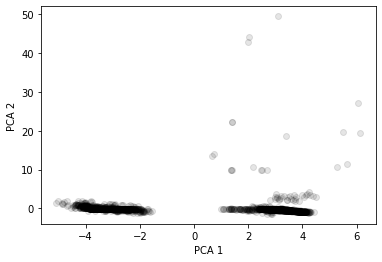

In [25]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## Pre PCA

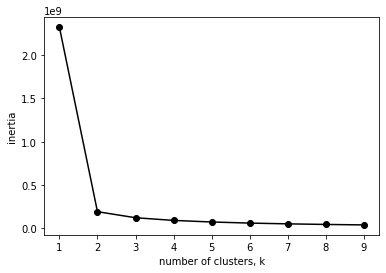

In [12]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(feature_values.iloc[:,:20])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Post PCA

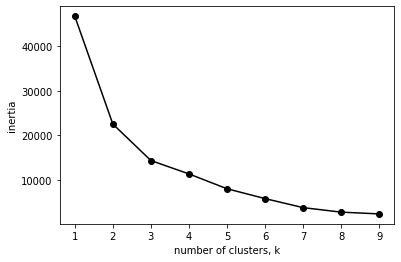

In [26]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:5])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()